# Exercises 07

## Exercise 07.2
The exercise consist of performing a Monte Carlo simulation via a Lennard-Jones model of Argon. The quantities are expressed in natural units, where the fixed values $\sigma$ = 0.34 nm for length, $\epsilon / k_B$ = 120 K for temperature and $m=39.948$ amu for mass.
Note: in exercise 07.1, I managed to add the tails correction to the potential energy and the virial, in order to correct the pressure. 
\
The simulations are performed in three different situations:
1. solid phase: $\rho^* = 1.1$ and $T^* = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^* = 0.8$ and $T^* = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^* = 0.05$ and $T^* = 1.2$ (cut-off radius: $r_c = 5.0$)

Considering that the simulation has been performed in the canonical ensemble, it can be noted that the temperature and the kinetic energy are perfectly fixed at the initial value provided in the input file.
\
Such as every simulation which uses the Metropolis algorithm, it is necessary the equilibration, in deed, the data produced are correlated to each other (the Metropolis algorithm is autocorrelated). It's fundamental the use of data blocking in order to provide well behaving results, which follow the hypotesis of the Central Limit Theorem.

### Decorrelation
As shown below, the decorrelation Monte Carlo time is $\tau_{solid} =$ 9.11 for the simulation of the solid in the given conditions, $\tau_{liquid} =$ 12.36 for the simulation of the liquid, and $\tau_{gas} =$ 29.92 for the simulation of the gas, so it is reasonable to think that the blocks should have a size of at least 100 elements in the solid and liquid phase and at least 500 for the gas phase.

Caratteristic Monte Carlo time of decorrelation for a solid: 9.11


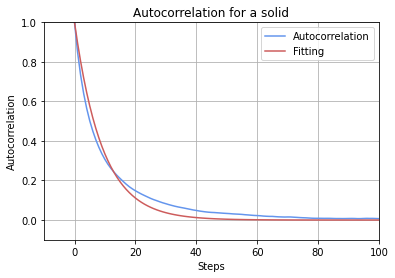

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# autocorrelation data obtained runnig a c++ code
def fitting(x, b):
    return np.exp(- x / b)

# solid simulated at T* = 0.8
index = np.loadtxt("./dataEx2/solid/autocorrelation.dat", usecols = 0)
autoc = np.loadtxt("./dataEx2/solid/autocorrelation.dat", usecols = 1)

popt, pcov = curve_fit(fitting, index[:100], autoc[:100])
a_fit = fitting(index, popt[0])
print("Caratteristic Monte Carlo time of decorrelation for a solid:", round(popt[0], 2))

plt.title("Autocorrelation for a solid")
plt.plot(index, autoc, color="cornflowerblue")
plt.plot(index, a_fit, color="indianred")
plt.legend(["Autocorrelation", "Fitting"], loc=0)
plt.xlabel("Steps")
plt.ylabel("Autocorrelation")
plt.xlim(-10, 100)
plt.ylim(-0.1, 1)
plt.grid()
plt.show()

Caratteristic Monte Carlo time of decorrelation for a liquid: 12.36


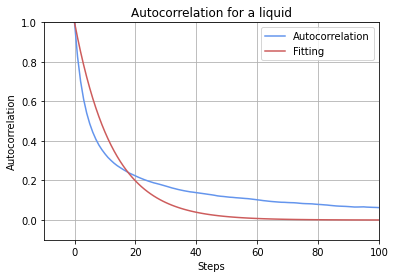

In [2]:
# liquid simulated at T* = 1.1
index = np.loadtxt("./dataEx2/liquid/autocorrelation.dat", usecols = 0)
autoc = np.loadtxt("./dataEx2/liquid/autocorrelation.dat", usecols = 1)

popt, pcov = curve_fit(fitting, index[:100], autoc[:100])
a_fit = fitting(index, popt[0])
print("Caratteristic Monte Carlo time of decorrelation for a liquid:", round(popt[0], 2))

plt.title("Autocorrelation for a liquid")
plt.plot(index, autoc, color="cornflowerblue")
plt.plot(index, a_fit, color="indianred")
plt.legend(["Autocorrelation", "Fitting"], loc=0)
plt.xlabel("Steps")
plt.ylabel("Autocorrelation")
plt.xlim(-10, 100)
plt.ylim(-0.1, 1)
plt.grid()
plt.show()

Caratteristic Monte Carlo time of decorrelation for a gas: 27.92


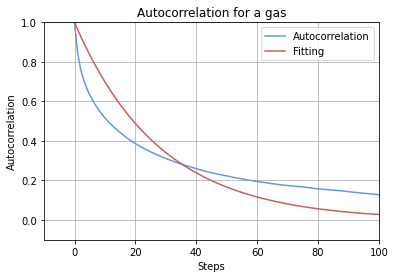

In [3]:
# gas simulated at T* = 1.2
index = np.loadtxt("./dataEx2/gas/autocorrelation.dat", usecols = 0)
autoc = np.loadtxt("./dataEx2/gas/autocorrelation.dat", usecols = 1)

popt, pcov = curve_fit(fitting, index[:100], autoc[:100])
a_fit = fitting(index, popt[0])
print("Caratteristic Monte Carlo time of decorrelation for a gas:", round(popt[0], 2))

plt.title("Autocorrelation for a gas")
plt.plot(index, autoc, color="cornflowerblue")
plt.plot(index, a_fit, color="indianred")
plt.legend(["Autocorrelation", "Fitting"], loc=0)
plt.xlabel("Steps")
plt.ylabel("Autocorrelation")
plt.xlim(-10, 100)
plt.ylim(-0.1, 1)
plt.grid()
plt.show()

### Uncertainty per Phase
As shown below the maximal uncertainty in function of the block dimension is reached, for each phase, at 1000 elements per block. Then, in order to have some reasonable results, characterized by a big enough probability to be complitely uncorrelated, and the biggest statistical uncertainty, to avoid any underestimate, it has been chosen to run the following simulations with 25 blocks of 5000 elements each.

In [4]:
N = 500000
a = 3
points = 4 * a + 1

def error(avg1, avg2, i):
    if(i == 0):
        return 0
    else:
        return ((avg2 / (i+1) - (avg1 / (i+1))**2) / i) ** 0.5

data_solid = np.loadtxt("./dataEx2/solid/output_epot.dat", usecols = 1)
data_liquid = np.loadtxt("./dataEx2/liquid/output_epot.dat", usecols = 1)
data_gas = np.loadtxt("./dataEx2/gas/output_epot.dat", usecols = 1)
    
lun = np.zeros(points)
err_solid = np.zeros(points)
err_liquid = np.zeros(points)
err_gas = np.zeros(points)
ind = [1, 2, 5]

for i in range(points):
    L = ind[i % a] * 10 ** (int(i / a) + 1)
    lun[i] = L
    M = int(N / L)
    avg1_solid = 0
    avg2_solid = 0
    avg1_liquid = 0
    avg2_liquid = 0
    avg1_gas = 0
    avg2_gas = 0
    for j in range(M):
        app1_solid = 0
        app1_liquid = 0
        app1_gas = 0
        for k in range(L):
            app1_solid += data_solid[j * L + k]
            app1_liquid += data_liquid[j * L + k]
            app1_gas += data_gas[j * L + k]
        
        avg1_solid += (app1_solid / L)
        avg2_solid += (app1_solid / L) ** 2
        avg1_liquid += (app1_liquid / L)
        avg2_liquid += (app1_liquid / L) ** 2
        avg1_gas += (app1_gas / L)
        avg2_gas += (app1_gas / L) ** 2
            
    err_solid[i] = error(avg1_solid, avg2_solid, M-1)
    err_liquid[i] = error(avg1_liquid, avg2_liquid, M-1)
    err_gas[i] = error(avg1_gas, avg2_gas, M-1)

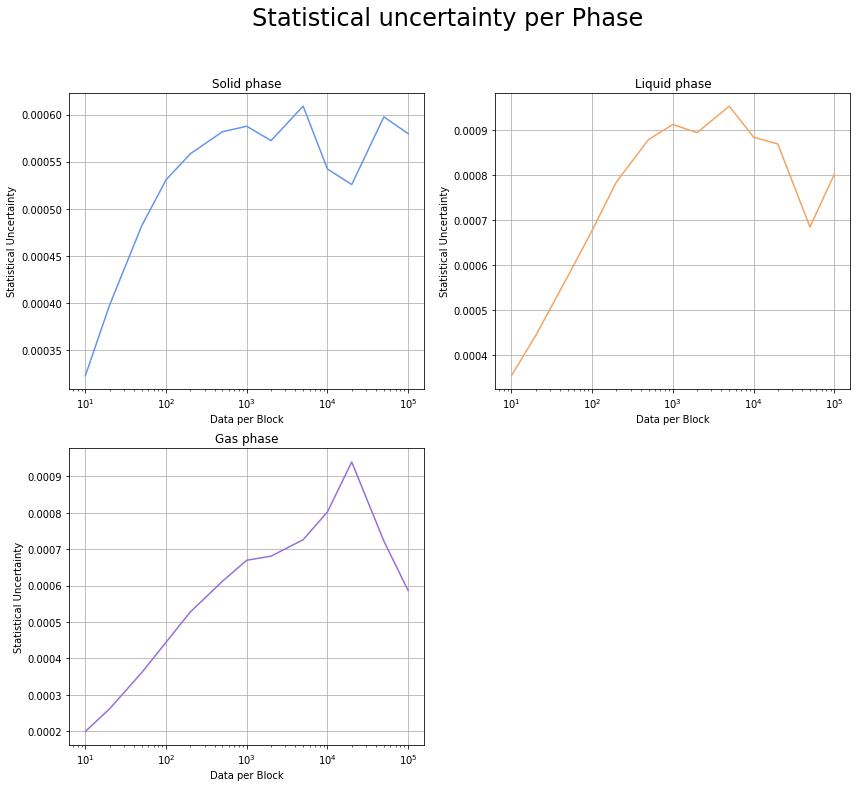

In [5]:
fig = plt.figure(figsize=[14, 12])

fig.suptitle("Statistical uncertainty per Phase", fontsize=24)

fig.add_subplot(221)    
plt.plot(lun, err_solid, color="cornflowerblue")
plt.title("Solid phase")
plt.xscale("log")
plt.xlabel("Data per Block")
plt.ylabel("Statistical Uncertainty")
plt.grid()

fig.add_subplot(222)    
plt.plot(lun, err_liquid, color="sandybrown")
plt.title("Liquid phase")
plt.xscale("log")
plt.xlabel("Data per Block")
plt.ylabel("Statistical Uncertainty")
plt.grid()

fig.add_subplot(223)    
plt.plot(lun, err_gas, color="mediumpurple")
plt.title("Gas phase")
plt.xscale("log")
plt.xlabel("Data per Block")
plt.ylabel("Statistical Uncertainty")
plt.grid()

plt.show()

## Exercise 07.4

### Radial distribution function

The radial distribution function provides useful information to comprehend the structure of a fluid, or more in general of a many body system. In order to calculate such a distribution an histogram is filled by increasing by 2 the bin correpsondent to the interval $[r, r+dr]$, where $dr = \frac{1}{N} \frac{L}{2}$, with $N$ the number of bins, and it is fixed as $N = 200$, then the histogram has to be normalized dividing the content of each been by the volume of the spheric shell of external radius $r + dr$ and internal radius $r$:

$$
\Delta V(r) = \frac{4}{3} \pi \left( (r+dr)^3 - r^3\right)
$$

### Solid

The plot below shows the trend of the radial distribution functions for the solid phase for the Monte Carlo $g_{MC}(r)$ (NVT) and Molecular Dynamics $g_{MD}(r)$ (NVE) simulations, with $r \in [0, L/2]$ where $L$ is the side of the box. The results are perfectly compatible, indeed the plot shows the same curves. Moreover, one can see the real difference between the two curves in the last plot.

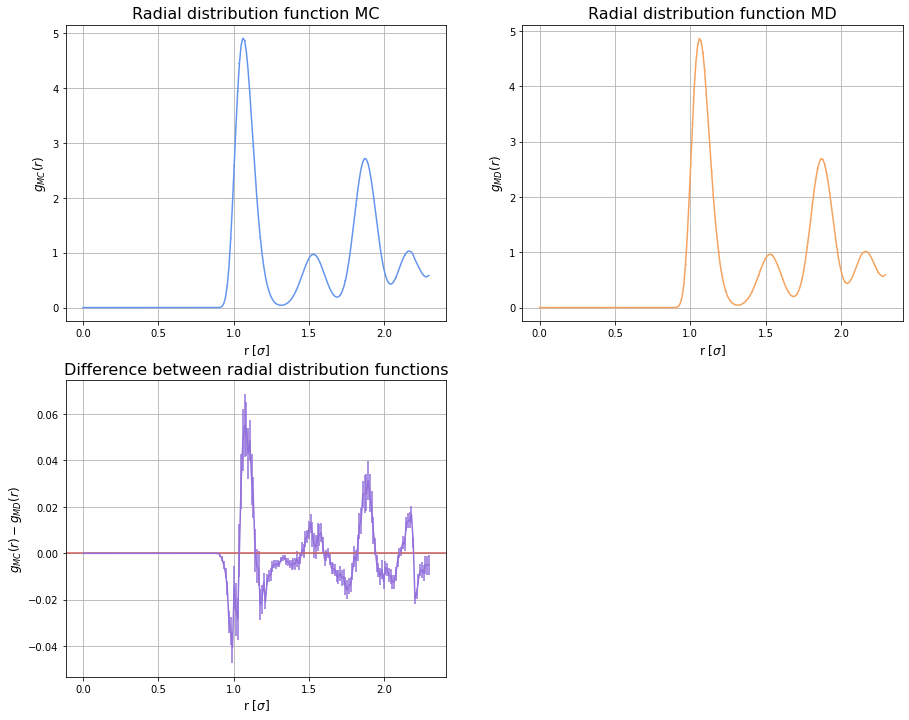

In [6]:
import numpy as np
from matplotlib import pyplot as plt

r = np.loadtxt("./dataEx4/MC/solid/output_histogram.dat", usecols=0)
data_gofr_MC = np.loadtxt("./dataEx4/MC/solid/output_histogram.dat", usecols=1)
err_gofr_MC  = np.loadtxt("./dataEx4/MC/solid/output_histogram.dat", usecols=2)
data_gofr_MD = np.loadtxt("./dataEx4/MD/solid/output_histogram.dat", usecols=1)
err_gofr_MD  = np.loadtxt("./dataEx4/MD/solid/output_histogram.dat", usecols=2)

dr = r[1]
dv = np.zeros(200)
const = 4. * np.pi / 3.
for i in range(200):
    dv[i] = const * ((r[i] + dr)**3 - r[i]**3)

fig = plt.figure(1,figsize=[15,12])
fig.add_subplot(221)
plt.errorbar(r, data_gofr_MC / (dv * 1.1 * 108), yerr = err_gofr_MC / (dv * 1.1 * 108), color="cornflowerblue")
plt.title("Radial distribution function MC", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MC}(r)$", fontsize=12)
plt.grid()

fig.add_subplot(222)
plt.errorbar(r, data_gofr_MD / (dv * 1.1 * 108), yerr = err_gofr_MD / (dv * 1.1 * 108), color="sandybrown")
plt.title("Radial distribution function MD", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MD}(r)$", fontsize=12)
plt.grid()

fig.add_subplot(223)
plt.errorbar(r, (data_gofr_MC - data_gofr_MD) / (dv * 1.1 * 108), yerr = np.sqrt(err_gofr_MC**2 + err_gofr_MD**2) / (dv * 1.1 * 108), color="mediumpurple")
plt.axhline(y=0, color="indianred")
plt.title("Difference between radial distribution functions", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MC}(r) - g_{MD}(r)$", fontsize=12)
plt.grid()

plt.show()

The plots below represent the Potential energy per particle and the Pressure of the solid, the results between the two ensembles are different, in the NVT, which characterize the Monte Carlo simulation, the temperature does not vary, then, in order to keep this feature, the energy can vary, as shwon by the large error bars of the **MC** plots, while in the NVE ensemble, which characterize the Molecular Dynamics simulation, the energy does not vary, then the temperature varys a lot, as one can see in **Exercises 04**, so there are small error bars in the **MD** plots, but it more difficult to reach a comparable result between the two ensemble.

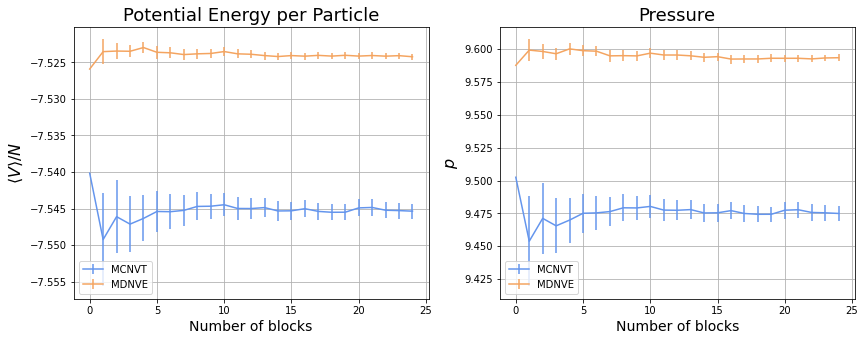

In [7]:
nblocks = np.arange(25)
data_epot_MC = np.loadtxt("./dataEx4/MC/solid/output_epot.dat", usecols=2)
errb_epot_MC = np.loadtxt("./dataEx4/MC/solid/output_epot.dat", usecols=3)
data_epot_MD = np.loadtxt("./dataEx4/MD/solid/output_epot.dat", usecols=2)
errb_epot_MD = np.loadtxt("./dataEx4/MD/solid/output_epot.dat", usecols=3)

data_pres_MC = np.loadtxt("./dataEx4/MC/solid/output_pres.dat", usecols=2)
errb_pres_MC = np.loadtxt("./dataEx4/MC/solid/output_pres.dat", usecols=3)
data_pres_MD = np.loadtxt("./dataEx4/MD/solid/output_pres.dat", usecols=2)
errb_pres_MD = np.loadtxt("./dataEx4/MD/solid/output_pres.dat", usecols=3)

fig = plt.figure(1, figsize=[14, 5])

fig.add_subplot(1, 2, 1)
plt.errorbar(nblocks, data_epot_MC, yerr=errb_epot_MC, color="cornflowerblue")
plt.errorbar(nblocks, data_epot_MD, yerr=errb_epot_MD, color="sandybrown")
plt.legend(["MCNVT", "MDNVE"], loc=0)
plt.title("Potential Energy per Particle", fontsize=18)
plt.xlabel("Number of blocks", fontsize=14)
plt.ylabel(r"$\langle V \rangle / N$", fontsize=16)
plt.grid()

fig.add_subplot(1, 2, 2)
plt.errorbar(nblocks, data_pres_MC, yerr=errb_pres_MC, color="cornflowerblue")
plt.errorbar(nblocks, data_pres_MD, yerr=errb_pres_MD, color="sandybrown")
plt.legend(["MCNVT", "MDNVE"], loc=0)
plt.title("Pressure", fontsize=18)
plt.xlabel("Number of blocks", fontsize=14)
plt.ylabel(r"$p$", fontsize=16)
plt.grid()

plt.show()

### Liquid

The plot below shows the trend of the radial distribution functions for the liquis phase for the Monte Carlo $g_{MC}(r)$ (NVT) and Molecular Dynamics $g_{MD}(r)$ (NVE) simulations, with $r \in [0, L/2]$ where $L$ is the side of the box. The results are perfectly compatible, indeed the plot shows the same curves. Moreover, one can see the real difference between the two curves in the last plot.

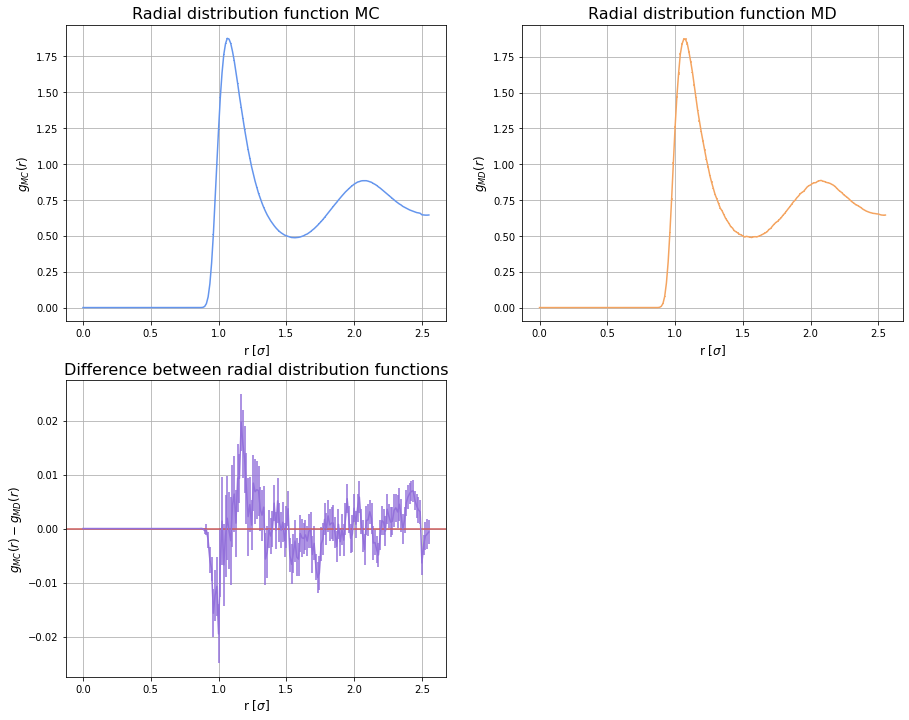

In [8]:
import numpy as np
from matplotlib import pyplot as plt

r = np.loadtxt("./dataEx4/MC/liquid/output_histogram.dat", usecols=0)
data_gofr_MC = np.loadtxt("./dataEx4/MC/liquid/output_histogram.dat", usecols=1)
err_gofr_MC  = np.loadtxt("./dataEx4/MC/liquid/output_histogram.dat", usecols=2)
data_gofr_MD = np.loadtxt("./dataEx4/MD/liquid/output_histogram.dat", usecols=1)
err_gofr_MD  = np.loadtxt("./dataEx4/MD/liquid/output_histogram.dat", usecols=2)

dr = r[1]
dv = np.zeros(200)
for i in range(200):
    dv[i] = 4. * np.pi * ((r[i] + dr)**3 - r[i]**3) / 3.

fig = plt.figure(1,figsize=[15,12])
fig.add_subplot(221)
plt.errorbar(r, data_gofr_MC / (dv * 1.1 * 108), yerr = err_gofr_MC / (dv * 1.1 * 108), color="cornflowerblue")
plt.title("Radial distribution function MC", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MC}(r)$", fontsize=12)
plt.grid()

fig.add_subplot(222)
plt.errorbar(r, data_gofr_MD / (dv * 1.1 * 108), yerr = err_gofr_MD / (dv * 1.1 * 108), color="sandybrown")
plt.title("Radial distribution function MD", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MD}(r)$", fontsize=12)
plt.grid()

fig.add_subplot(223)
plt.errorbar(r, (data_gofr_MC - data_gofr_MD) / (dv * 1.1 * 108), yerr = np.sqrt(err_gofr_MC**2 + err_gofr_MD**2) / (dv * 1.1 * 108), color="mediumpurple")
plt.axhline(y=0, color="indianred")
plt.title("Difference between radial distribution functions", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MC}(r) - g_{MD}(r)$", fontsize=12)
plt.grid()

plt.show()

The same considerations made for the solid phase can be applied to the liquid one, indeed the problems are similar, and the results for the two ensembles are not comperable. One can notice that, in this case, the error bars have a comparable sizes, this trend will continue in the gasseous phase.

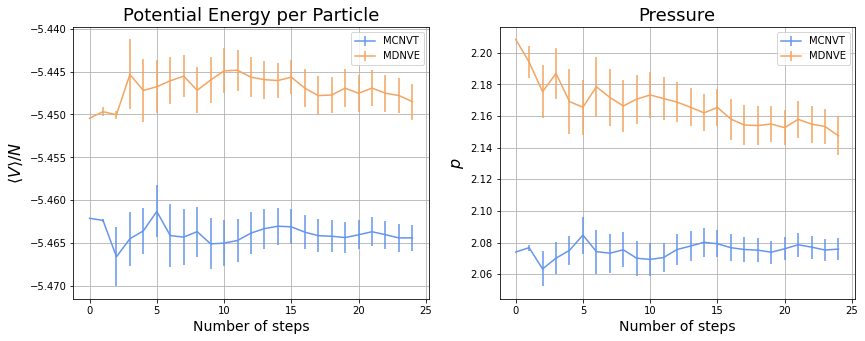

In [9]:
data_epot_MC = np.loadtxt("./dataEx4/MC/liquid/output_epot.dat", usecols=2)
errb_epot_MC = np.loadtxt("./dataEx4/MC/liquid/output_epot.dat", usecols=3)
data_epot_MD = np.loadtxt("./dataEx4/MD/liquid/output_epot.dat", usecols=2)
errb_epot_MD = np.loadtxt("./dataEx4/MD/liquid/output_epot.dat", usecols=3)

data_pres_MC = np.loadtxt("./dataEx4/MC/liquid/output_pres.dat", usecols=2)
errb_pres_MC = np.loadtxt("./dataEx4/MC/liquid/output_pres.dat", usecols=3)
data_pres_MD = np.loadtxt("./dataEx4/MD/liquid/output_pres.dat", usecols=2)
errb_pres_MD = np.loadtxt("./dataEx4/MD/liquid/output_pres.dat", usecols=3)

fig = plt.figure(1, figsize=[14, 5])

fig.add_subplot(1, 2, 1)
plt.errorbar(nblocks, data_epot_MC, yerr=errb_epot_MC, color="cornflowerblue")
plt.errorbar(nblocks, data_epot_MD, yerr=errb_epot_MD, color="sandybrown")
plt.legend(["MCNVT", "MDNVE"], loc=0)
plt.title("Potential Energy per Particle", fontsize=18)
plt.xlabel("Number of steps", fontsize=14)
plt.ylabel(r"$\langle V \rangle / N$", fontsize=16)
plt.grid()

fig.add_subplot(1, 2, 2)
plt.errorbar(nblocks, data_pres_MC, yerr=errb_pres_MC, color="cornflowerblue")
plt.errorbar(nblocks, data_pres_MD, yerr=errb_pres_MD, color="sandybrown")
plt.legend(["MCNVT", "MDNVE"], loc=0)
plt.title("Pressure", fontsize=18)
plt.xlabel("Number of steps", fontsize=14)
plt.ylabel(r"$p$", fontsize=16)
plt.grid()

plt.show()

 ### Gas

The plot below shows the trend of the radial distribution functions for the liquis phase for the Monte Carlo $g_{MC}(r)$ (NVT) and Molecular Dynamics $g_{MD}(r)$ (NVE) simulations, with $r \in [0, L/2]$ where $L$ is the side of the box. The results are perfectly compatible, indeed the plot shows the same curves. Moreover, one can see the real difference between the two curves in the last plot.

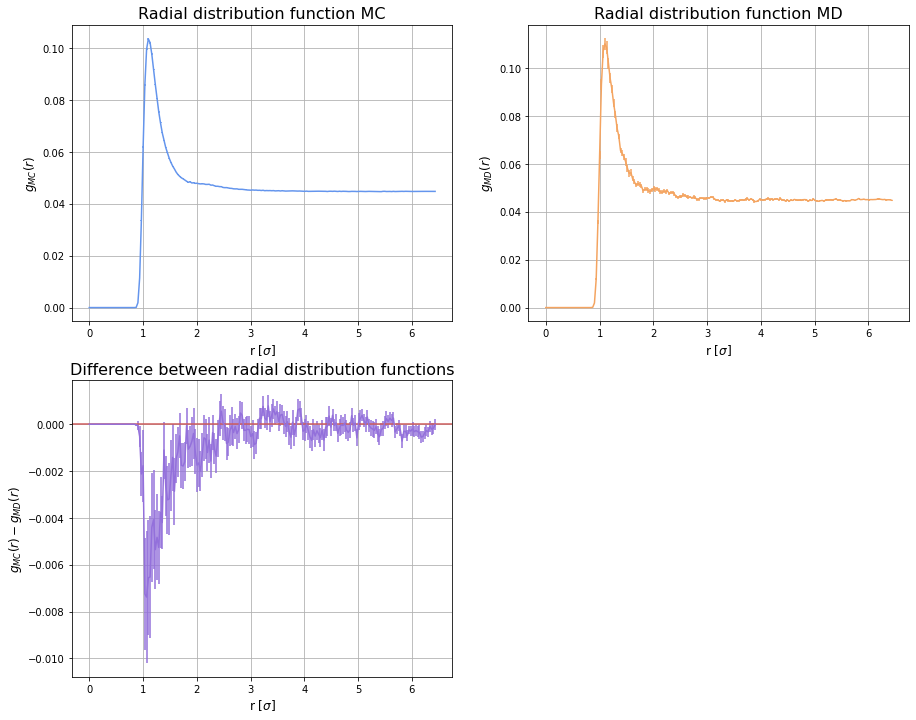

In [10]:
r = np.loadtxt("./dataEx4/MC/gas/output_histogram.dat", usecols=0)
data_gofr_MC = np.loadtxt("./dataEx4/MC/gas/output_histogram.dat", usecols=1)
err_gofr_MC  = np.loadtxt("./dataEx4/MC/gas/output_histogram.dat", usecols=2)
data_gofr_MD = np.loadtxt("./dataEx4/MD/gas/output_histogram.dat", usecols=1)
err_gofr_MD  = np.loadtxt("./dataEx4/MD/gas/output_histogram.dat", usecols=2)

dr = r[1]
dv = np.zeros(200)
const = 4. * np.pi / 3.
for i in range(200):
    dv[i] = const * ((r[i] + dr)**3 - r[i]**3)
    
fig = plt.figure(1,figsize=[15,12])
fig.add_subplot(221)
plt.errorbar(r, data_gofr_MC / (dv * 1.1 * 108), yerr = err_gofr_MC / (dv * 1.1 * 108), color="cornflowerblue")
plt.title("Radial distribution function MC", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MC}(r)$", fontsize=12)
plt.grid()

fig.add_subplot(222)
plt.errorbar(r, data_gofr_MD / (dv * 1.1 * 108), yerr = err_gofr_MD / (dv * 1.1 * 108), color="sandybrown")
plt.title("Radial distribution function MD", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MD}(r)$", fontsize=12)
plt.grid()

fig.add_subplot(223)
plt.errorbar(r, (data_gofr_MC - data_gofr_MD) / (dv * 1.1 * 108), yerr = np.sqrt(err_gofr_MC**2 + err_gofr_MD**2) / (dv * 1.1 * 108), color="mediumpurple")
plt.axhline(y=0, color="indianred")
plt.title("Difference between radial distribution functions", fontsize=16)
plt.xlabel("r $[\sigma]$", fontsize=12)
plt.ylabel("$g_{MC}(r) - g_{MD}(r)$", fontsize=12)
plt.grid()

plt.show()

In the gas phase case the potential energy per particle and the pressure are comparable, in particular the pressure due to the large error bars brought by the Molecular Dynamics simulation, in contrast with the result in the solid phase.

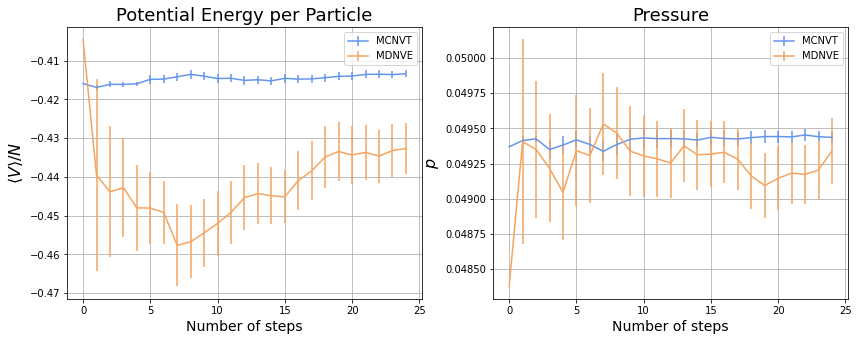

In [11]:
nsteps = np.arange(100) + 1
data_epot_MC = np.loadtxt("./dataEx4/MC/gas/output_epot.dat", usecols=2)
errb_epot_MC = np.loadtxt("./dataEx4/MC/gas/output_epot.dat", usecols=3)
data_epot_MD = np.loadtxt("./dataEx4/MD/gas/output_epot.dat", usecols=2)
errb_epot_MD = np.loadtxt("./dataEx4/MD/gas/output_epot.dat", usecols=3)

data_pres_MC = np.loadtxt("./dataEx4/MC/gas/output_pres.dat", usecols=2)
errb_pres_MC = np.loadtxt("./dataEx4/MC/gas/output_pres.dat", usecols=3)
data_pres_MD = np.loadtxt("./dataEx4/MD/gas/output_pres.dat", usecols=2)
errb_pres_MD = np.loadtxt("./dataEx4/MD/gas/output_pres.dat", usecols=3)

fig = plt.figure(1, figsize=[14, 5])

fig.add_subplot(1, 2, 1)
plt.errorbar(nblocks, data_epot_MC, yerr=errb_epot_MC, color="cornflowerblue")
plt.errorbar(nblocks, data_epot_MD, yerr=errb_epot_MD, color="sandybrown")
plt.legend(["MCNVT", "MDNVE"], loc=0)
plt.title("Potential Energy per Particle", fontsize=18)
plt.xlabel("Number of steps", fontsize=14)
plt.ylabel(r"$\langle V \rangle / N$", fontsize=16)
plt.grid()

fig.add_subplot(1, 2, 2)
plt.errorbar(nblocks, data_pres_MC, yerr=errb_pres_MC, color="cornflowerblue")
plt.errorbar(nblocks, data_pres_MD, yerr=errb_pres_MD, color="sandybrown")
plt.legend(["MCNVT", "MDNVE"], loc=0)
plt.title("Pressure", fontsize=18)
plt.xlabel("Number of steps", fontsize=14)
plt.ylabel(r"$p$", fontsize=16)
plt.grid()

plt.show()